In [1]:
import numpy as np
import geopandas  as gpd
import matplotlib.pyplot as plt
import shapely as shp
import pandas as pd

In [2]:
ruta_municipios = "/datasets/municipios.geojson"
ruta_precios = "/datasets/precios_combustible.csv"
shapes = gpd.read_file(ruta_municipios)
precios = gpd.read_file(ruta_precios)

In [3]:
precios.head()

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
0,18,CAQUETA,18756,SOLANO,COMERCIALIZADORA EL HUECO,TERPEL,Puerto Principal,BIODIESEL EXTRA,8500,1,01/08/2015 12:00:00 AM,None
1,99,VICHADA,99624,SANTA ROSALIA,ESTACION DE SERVICIO LA VICTORIA,BRIO,Carrera 9 con calle 3 No. 08-92-96,BIODIESEL EXTRA,9000,1,01/08/2016 12:00:00 AM,None
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
3,05,ANTIOQUIA,05837,TURBO,BOMBA CODI EL PUEBLO,PROXXON,CRA 13 99 A 41,BIODIESEL EXTRA,8893,1,05/07/2018 12:00:00 AM,None
4,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,BIODIESEL EXTRA,7500,1,01/28/2017 12:00:00 AM,None


<Axes: >

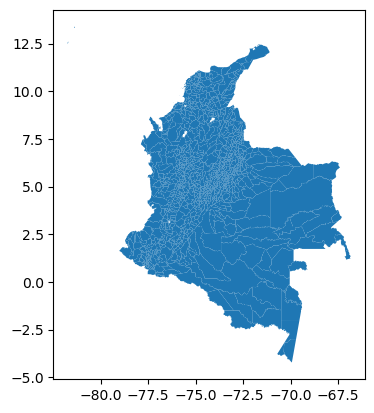

In [4]:
shapes.plot()

In [5]:
# Listar los productos para escoger uno
precios["producto"].unique()
# Filtar por producto
precios_gasolina = precios[precios["producto"] == "GASOLINA CORRIENTE OXIGENADA"]
print(len(precios_gasolina))
precios_gasolina.head()

5291


,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
5,68,SANTANDER,68235,EL CARMEN DE CHUCURI,ESTACION DE SERVICIO EL PORVENIR CARMEN DE CHU...,TERPEL,CORREGIMIENTO EL CENTENARIO,GASOLINA CORRIENTE OXIGENADA,9080,1,01/22/2015 12:00:00 AM,None
7,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,GASOLINA CORRIENTE OXIGENADA,8300,1,01/28/2017 12:00:00 AM,None
8,95,GUAVIARE,95200,MIRAFLORES,ESTACION DE SERVICIO LA ESMERALDA 1,TERPEL,VIA AEROPUERTO PRINCIPAL BARRIO CHINO,GASOLINA CORRIENTE OXIGENADA,10900,1,01/29/2018 12:00:00 AM,None
12,52,NARIÑO,52256,EL ROSARIO,ESTACION DE SERVICIO AUTOCENTRO ESMERALDAS,BIOMAX,CORREGIMIENTO LA ESMERALDA,GASOLINA CORRIENTE OXIGENADA,6500,1,01/24/2018 12:00:00 AM,None


In [7]:
precios_agrupados = precios_gasolina.groupby("municipionombre", as_index=False)["precio"].agg(["max"])
precios_mapa = shapes.merge(precios_agrupados, right_on="municipionombre", left_on="MPIO_CNMBR")
precios_mapa.head()

,OBJECTID_1,DPTO_CCDGO,MPIO_CCDGO,Shape_Leng,OBJECTID,MPIO_CNMBR,DESCRPCION,DEPTO,P_ENERSI,P_ENERNO,...,P_GASNNO,P_GASNNOIN,P_TELEFSI,P_TELEFNO,P_TELEFNOI,ShapeSTArea,ShapeSTLength,geometry,municipionombre,max
0,1,18,001,2.942508,49,FLORENCIA,AREA # 18001,CAQUETA,28423.0,1992.0,...,30415,0,13472,16507,436,2.565432e+09,325351.760092,"POLYGON ((-75.42074 2.19413, -75.42628 2.19504...",FLORENCIA,9290
1,27,19,290,0.367595,929,FLORENCIA,AREA # 19290,CAUCA,NaN,NaN,...,1517,0,22,1469,26,5.691709e+07,40418.288503,"POLYGON ((-77.05261 1.74043, -77.05333 1.74024...",FLORENCIA,9290
2,2,18,029,1.112829,50,ALBANIA,AREA # 18029,CAQUETA,906.0,464.0,...,1370,0,131,1227,12,4.166676e+08,122370.537837,"POLYGON ((-75.89506 1.36570, -75.89546 1.36587...",ALBANIA,9450
3,563,44,035,1.485416,751,ALBANIA,AREA # 44035,LA GUAJIRA,NaN,NaN,...,2478,144,793,2573,148,5.706930e+08,165148.555402,"POLYGON ((-72.52248 11.40721, -72.52246 11.407...",ALBANIA,9450
4,973,68,020,0.876130,247,ALBANIA,AREA # 68020,SANTANDER,1067.0,189.0,...,1160,10,24,1222,10,1.690158e+08,97045.537144,"POLYGON ((-73.73616 5.87092, -73.73606 5.87157...",ALBANIA,9450


Text(0.5, 1.0, 'Precios de gasolina 2018')

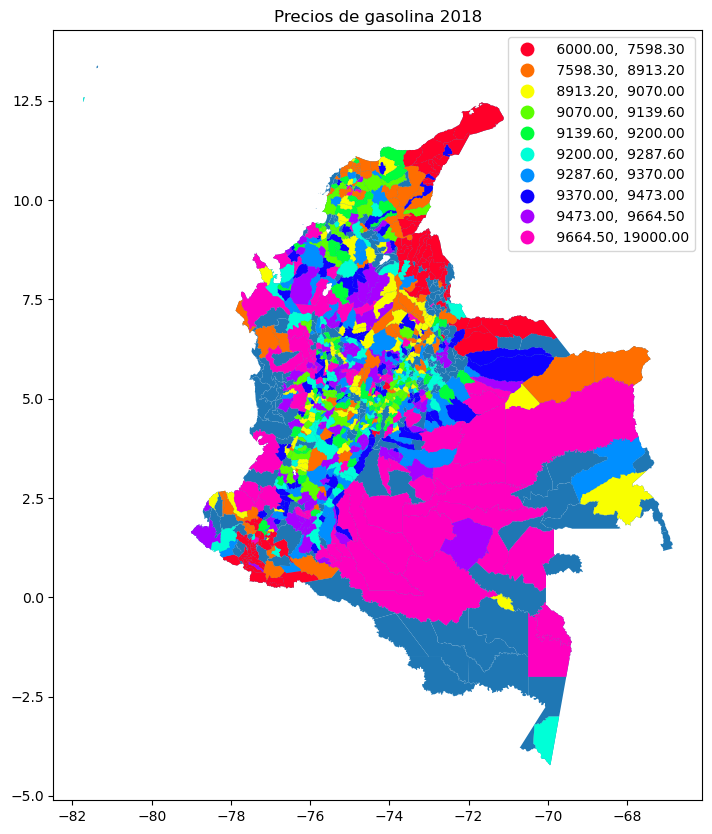

In [8]:
# Dibujar sobre el mapa
axis = shapes["geometry"].plot(figsize=(15,10))
precios_mapa["max"] = precios_mapa["max"].apply(lambda x: int(x))
precios_mapa.plot(column="max", ax=axis, legend=True, scheme="Quantiles",k=10, cmap="gist_rainbow")
axis.set_title("Precios de gasolina 2018")